<a href="https://colab.research.google.com/github/SaiKathika/LSTM/blob/main/RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas_datareader as web
import numpy as np
import math
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
#from keras.models import Sequential
#from keras.layers import Dense, LSTM
from tensorflow.python.keras.layers import Dense, LSTM
from tensorflow.python.keras import Sequential
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [5]:
#get the data
df = web.DataReader('RELIANCE.NS', 'yahoo', '2016-01-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-01,504.666260,499.366516,500.158997,502.907928,2499742.0,486.556549
2016-01-04,502.140198,488.717438,497.781525,492.977081,13923887.0,476.948639
2016-01-05,500.258057,493.819092,495.453583,497.855835,6897687.0,481.668732
2016-01-06,514.324707,495.503113,499.069336,511.253815,12349673.0,494.631134
2016-01-07,509.173553,499.292206,505.731171,501.867798,9109980.0,485.550232
...,...,...,...,...,...,...
2021-03-25,2054.000000,1985.000000,2054.000000,1991.449951,10153757.0,1991.449951
2021-03-26,2013.699951,1973.699951,2012.000000,1994.650024,9313160.0,1994.650024
2021-03-30,2048.899902,1991.550049,2008.000000,2029.300049,9433842.0,2029.300049


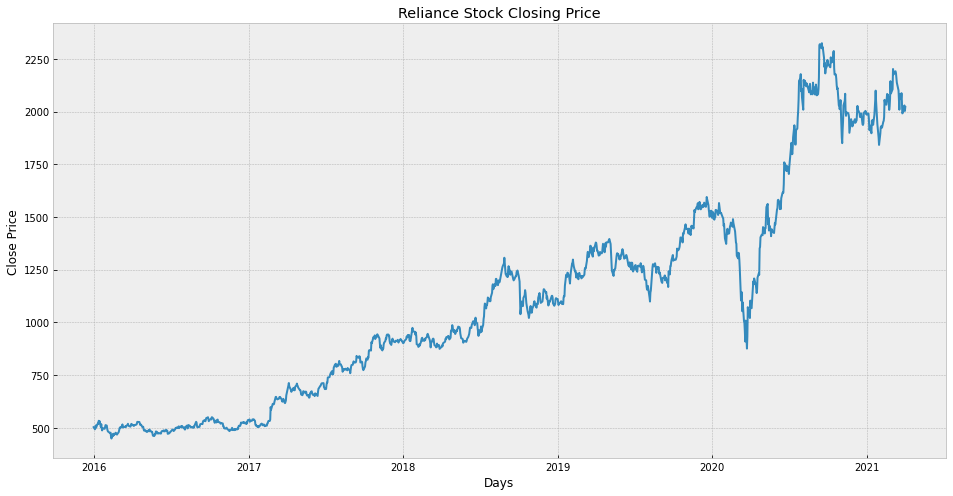

In [6]:
plt.figure(figsize=(16,8))
plt.title('Reliance Stock Closing Price')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.show()

In [7]:
data = df[['Close']]
data.head(5)

,Close
Date,
2016-01-01,502.907928
2016-01-04,492.977081
2016-01-05,497.855835
2016-01-06,511.253815
2016-01-07,501.867798


In [8]:
dataset = data.values   #numpy array
#rows
train_data_length = math.ceil(len(dataset) * .8)   #80% training data
train_data_length

1036

In [9]:
#preprocessing the data i.e. scaling to the input data before it is added to the RNN
scale = MinMaxScaler(feature_range=(0, 1))
scaled_data = scale.fit_transform(dataset)
scaled_data

array([[0.02873276],
       [0.02343781],
       [0.02603907],
       ...,
       [0.84257794],
       [0.82860853],
       [0.83860569]])

In [10]:
#Scaled training data set
train_data = scaled_data[0:train_data_length, :]  #rows = 80%, columns = all

In [11]:
#split the data into x_train and y_train
x_train, y_train = [], []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])   #x_train has 1st 60 i.e. 0 to 59 values
  y_train.append(train_data[i, 0])        #y_train has 60th value

  if(i<=60):
    print(x_train)
    print(y_train)

[array([0.02873276, 0.02343781, 0.02603907, 0.03318264, 0.02817818,
       0.03147928, 0.03830594, 0.03668179, 0.04497417, 0.04096004,
       0.04403664, 0.02912889, 0.03619326, 0.02588062, 0.02050643,
       0.02577497, 0.02572215, 0.02450736, 0.0291421 , 0.03402773,
       0.03268088, 0.02498272, 0.01976697, 0.01756185, 0.01699406,
       0.0143928 , 0.01345529, 0.01481533, 0.00475358, 0.        ,
       0.01061634, 0.00633811, 0.01216125, 0.00886015, 0.00998252,
       0.01472291, 0.01138219, 0.01217446, 0.00991651, 0.01156705,
       0.01587169, 0.01974057, 0.02507515, 0.02807255, 0.02636917,
       0.03180939, 0.03569148, 0.02778205, 0.0285083 , 0.02989475,
       0.03009282, 0.03042292, 0.02890442, 0.03186221, 0.03452951,
       0.03731563, 0.03239038, 0.0300664 , 0.03425221, 0.03710436])]
[0.03661579620748742]


In [12]:
#convert x_train & y_train to numpy
x_train, y_train = np.array(x_train), np.array(y_train)

In [13]:
x_train.shape

(976, 60)

In [14]:
#reshape the data to 3-Dimensional dataset
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))    #976, 60, 1(features = close price)
x_train.shape

(976, 60, 1)

In [15]:
#LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))    #first layer with 50 neurons, return_sequences were true bcoz we need another layer
model.add(LSTM(50, return_sequences = False))   #second layer with 50 neurons
model.add(Dense(25))    #dense layer with 25 neurons
model.add(Dense(1))

In [16]:
#Compile the model
model.compile(optimizer='adam', loss = 'mean_squared_error')    #optimizer improve upon the loss function, loss functions measures the loss

In [17]:
#train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

976/976 [==============================] - 65s 63ms/step - loss: 0.0072


In [18]:
#Create testing dataset
test_data = scaled_data[train_data_length - 60:, :]   #scaled values from 976:
#create x_test and y_test datasets
x_test = []
y_test = dataset[train_data_length:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [19]:
#convert data to numpy
x_test = np.array(x_test)

In [20]:
x_test.shape

(258, 60)

In [21]:
#reshape the data to 3D
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [23]:
#Get the predicted values
predictions = model.predict(x_test)
predictions = scale.inverse_transform(predictions)

In [26]:
#Get root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

88.67616189173026

In [29]:
#Plot the data 
train = data[:train_data_length]
valid = data[train_data_length:]
valid['Predictions'] = predictions
print(len(predictions))

258


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


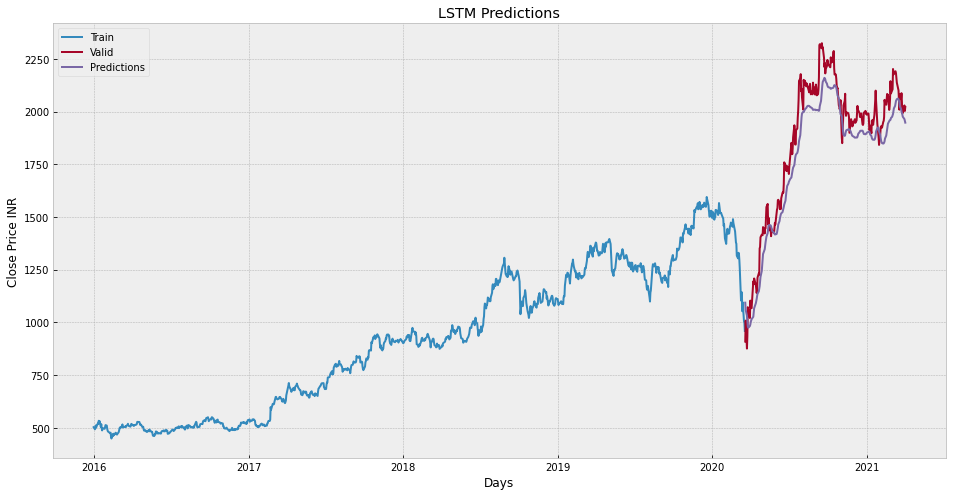

In [30]:
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('LSTM Predictions')
plt.xlabel('Days')
plt.ylabel('Close Price INR')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'])
plt.show()

In [31]:
#valid and predicted prices
valid

,Close,Predictions
Date,,
2020-03-19,909.082825,1093.576904
2020-03-20,1008.391479,1058.419312
2020-03-23,875.748779,1032.646606
2020-03-24,934.541504,1004.887085
2020-03-25,1072.087646,982.343994
...,...,...
2021-03-25,1991.449951,1986.753540
2021-03-26,1994.650024,1975.948364
2021-03-30,2029.300049,1964.289307


In [39]:
reliance = web.DataReader('RELIANCE.NS', 'yahoo', start='2016-01-01')
new_df = reliance[['Close']]
last_60_days = new_df[-60:].values
last_60_days_scaled = scale.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_price = model.predict(X_test)
predicted_price = scale.inverse_transform(predicted_price)
print(predicted_price)

[[1941.9945]]
